ASSIGNMENT 3 - SIT720 

1.Load data from digitData2.csv" file. The last column of each file presents the label and rest of the columns are features. 

In [2]:
import pandas as pd
import numpy as np
from google.colab import files 
import io
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['digitData2.csv']))

Saving digitData2.csv to digitData2.csv


In [3]:
data.shape

(1527, 65)

In [4]:
#Splitting the Target and feature variables 
random_state = 42
x = data.iloc[ :, 0:63]                                                       #Assigning all feature variables to x
y = data.iloc[:,64]                                                           #Assigning target variable to y

2. Selecting the optimum k value using Silhouette Coefficient and plot the optimum k values. 

In [5]:
import warnings
warnings.filterwarnings("ignore")
import sklearn.metrics as metrics
import sklearn.cluster as skc
Krange = range(3,13)
silhouette_score = []
for i in Krange:
    labels=skc.KMeans(n_clusters=i,random_state=42).fit(x).labels_
    score = metrics.silhouette_score(x,labels,metric="euclidean",sample_size=1527,random_state=42)
    silhouette_score.append(score)
    print ("Silhouette score for k = "+str(i)+" is "+str(metrics.silhouette_score(x,labels,metric="euclidean",sample_size=1527,random_state=42)))

Silhouette score for k = 3 is 0.12852487196679577
Silhouette score for k = 4 is 0.13184384596535292
Silhouette score for k = 5 is 0.13943996744051654
Silhouette score for k = 6 is 0.15755935081988642
Silhouette score for k = 7 is 0.17048187301812823
Silhouette score for k = 8 is 0.18499669073182623
Silhouette score for k = 9 is 0.1947091015068631
Silhouette score for k = 10 is 0.18827933292354992
Silhouette score for k = 11 is 0.18950612125207328
Silhouette score for k = 12 is 0.1916027330213541


<Axes: xlabel='Cluster', ylabel='Silohouette Score'>

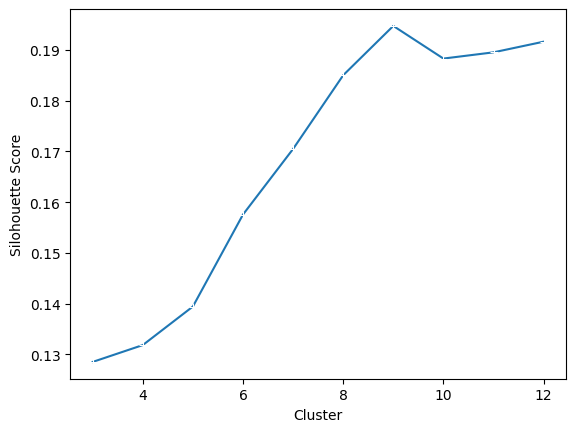

In [6]:
import seaborn as sns
silhouette = pd.DataFrame({'Cluster' : Krange, 'Silohouette Score' : silhouette_score})
sns.lineplot(x = 'Cluster', y = 'Silohouette Score', data = silhouette, marker="+")

3. Create clusters using Kmeans and Kmeans++ algorithms with optimal k value found in the previous problem. Report performances using appropriate evaluation metrics. Compare the results. 

In [7]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
model = KMeans(n_clusters=9, random_state=0) 
model.fit(x)
label = model.labels_
labels = sum(y == label)
model.inertia_
centre = model.cluster_centers_
print('Accuracy score: {0:0.2f}'. format(labels/(y.size)))

Accuracy score: 0.19


In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=9, init="k-means++", random_state=0) 
model.fit(x)
label = model.labels_
labels = sum(y == label)
print('Accuracy score: {0:0.2f}'. format(labels/(y.size)))

Accuracy score: 0.19


4. Now repeat clustering using Kmeans for 50 times and report the average performance. Again compare the results that you have obtained in Q3 using Kmeans++ and explain the difference (if any).

In [9]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
a = range (1,51)
for i in a:
  model = KMeans(n_clusters=i, random_state=0, max_iter = 50) 
  model.fit(x)
  labels = sum(y == label)
print('Accuracy score: {0:0.2f}'. format(labels/(y.size)))

Accuracy score: 0.19


5. Apply DBSCAN on this dataset (digitData2.csv) and find the optimum "eps" and "min_samples" value. Is the number of cluster same as the cluster found in Q2? Explain the similarity or differences that you have found between two solutions. 

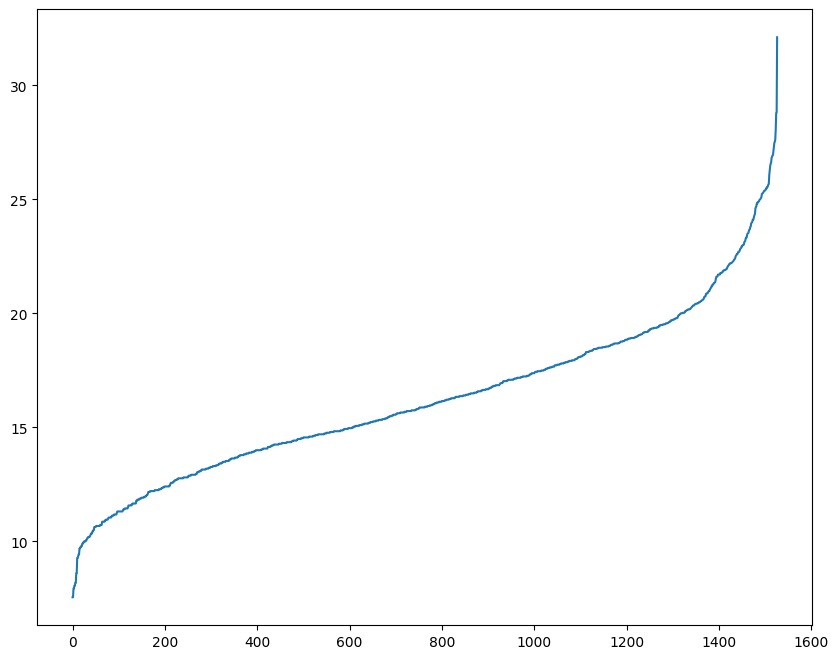

In [24]:
from sklearn.cluster import DBSCAN, KMeans 
from sklearn.neighbors import NearestNeighbors
nmodel = NearestNeighbors(n_neighbors=20).fit(x)
distances, indices = nmodel.kneighbors(x)
distances = nmodel.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

In [25]:
min_sample = range(10,25)
eps = np.arange(0.05,0.13, 0.01) 

In [26]:
output = []

for mins in min_sample:
    for ep in eps:
        labels = DBSCAN(min_sample=mins, eps = ep).fit(x).labels_
        output.append((mins, ep))

min_samples, eps = sorted(output, key=lambda x:x[-1])[-1]
print(f"min_sample: {min_sample}")
print(f"eps: {eps}")

min_samples: 24
eps: 0.12000000000000001


In [27]:
from collections import Counter
labels = DBSCAN(min_samples= 25, eps = 0.12).fit(x).labels_
clusters = len(Counter(labels))
print(f"Number of clusters: {clusters}")

Number of clusters: 1


The number of clusters are different. 